This is a python notebook where I can test out python 2 commands quickly.  As such, it's just a simple sandbox for me to play around and see if my understanding of python is confirmed or denied.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Testing arange usage

In [2]:
foo = arange(5)
foo1 = foo + 1
print foo
print foo1

[0 1 2 3 4]
[1 2 3 4 5]


#Testing that varying $I_{ref}$ doesn't affect the bifurcation point

In [3]:
import cPickle
import sys
import os
import glob

In [4]:
homedir = os.getcwd()
print homedir

/home/noza/work/sandbox/PyNotebooks


In [5]:
os.chdir('/home/noza/work/neuro-boa/apps/spring/calibration/')
print os.getcwd()

/home/noza/work/neuro-boa/apps/spring/calibration


In [6]:
execfile('basicCalibrationParams.py')

Using Chip Params from:
	/home/noza/data/calibData/endeavour/chip3/run9.0/packed_data/chipParam.pck
Called python script to get basic calibration parameters
board_id: endeavour	chip_id: 3	run_id: 9.0	syn_idx: 0
block_size: 256	offset: 0
home: /home/noza	folder_root: /home/noza/data/calibData/endeavour/chip3/run9.0


In [48]:
os.chdir(folder_root + '/packed_data/')
bifFileList = sorted(glob.glob('bifPoints_endeavour_*.pck'))
print 'Number of Iref values parsed: ', len(bifFileList)

Number of Iref values parsed:  10


In [58]:
Ils = loadtxt(folder_root + '/calibData/somaCalib_Il.dat')
print 'Il Values: ', Ils
Ics = loadtxt(folder_root + '/calibData/somaCalib_Ic.dat')
print 'Length of Ic Values: ', len(Ics)

Il Values:  [ 0.002  0.012  0.022  0.032  0.042  0.052  0.062  0.072  0.082  0.092
  0.102  0.112  0.122  0.132  0.142  0.152  0.162  0.172  0.182  0.192]
Length of Ic Values:  228


Bifurcation Points for varying Iref values


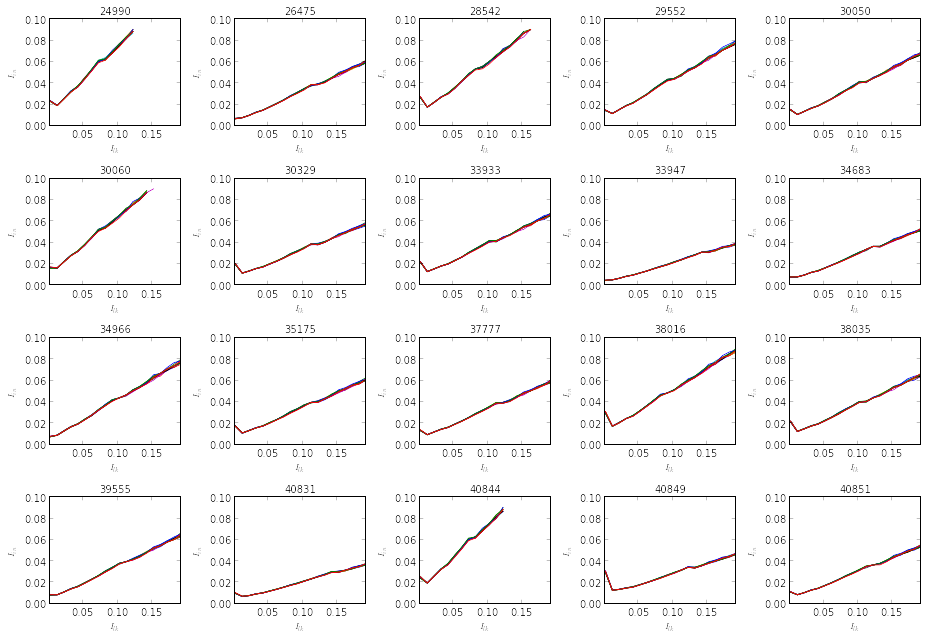

In [60]:
figure(figsize=(13,9))
if SingleNeurons:
    print "Bifurcation Points for varying Iref values"
    for i, singleNrnId in enumerate(sorted(singleNrns)):
        ax1 = subplot(floor(sqrt(len(singleNrns))),ceil(sqrt(len(singleNrns))), i+1)        
        
        for fileName in bifFileList:
            #print fileName
            bifPoints = cPickle.load(open(fileName))
            plot(Ils[0:len(bifPoints[singleNrnId])], bifPoints[singleNrnId])
            #print "Nrn: ", singleNrnId, "\t", bifPoints[singleNrnId]
        title(singleNrnId, fontsize=10)
        xlabel(r'$I_{lk}$', fontsize=9)
        ylabel(r'$I_{in}$', fontsize=9)
        xlim(min(Ils),max(Ils))
        ylim(0, max(Ics))
        tight_layout()
            

In [1]:
lookdist = 1
foo = range(-lookdist, lookdist+1)
print foo

[-1, 0, 1]


In [13]:
a = arange(10)
print a
print a[8]
print a
print a[2:6]
a[2:6] = 0
mask = a==0
print mask
print a[mask]
print a

[0 1 2 3 4 5 6 7 8 9]
8
[0 1 2 3 4 5 6 7 8 9]
[2 3 4 5]
[ True False  True  True  True  True False False False False]
[0 0 0 0 0]
[0 1 0 0 0 0 6 7 8 9]


In [93]:
x = arange(100)
y = arange(100)
x, y = meshgrid(x, y)
z = 2*(x+y)

(3725, 3)


<matplotlib.contour.QuadContourSet instance at 0x7f90c4f52cb0>

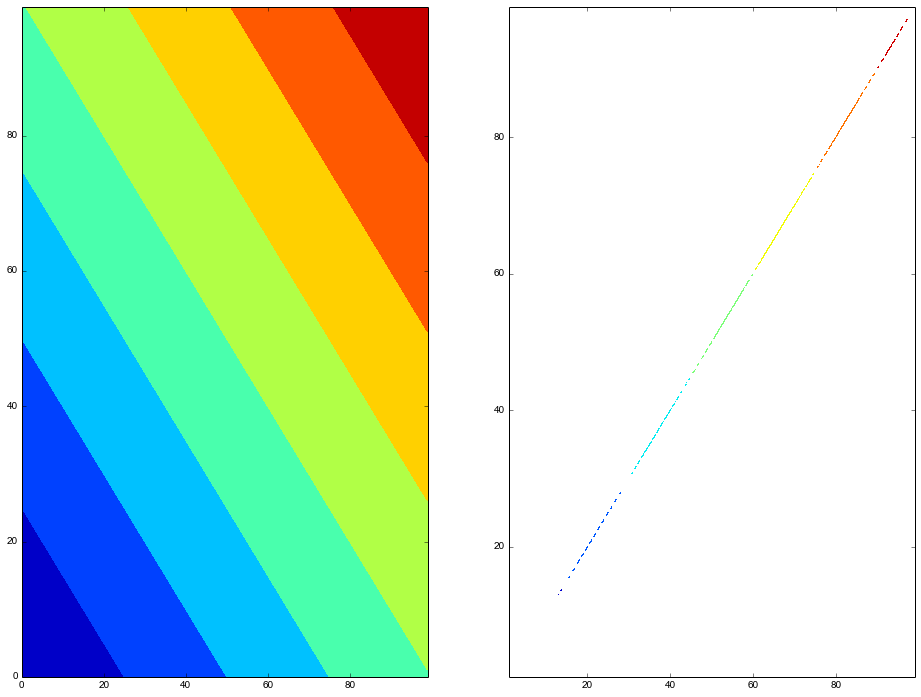

In [124]:
rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session
subplot(121)
contourf(x, y, z)

set_printoptions(threshold='nan')

mask = logical_and(z>=200, z<300)
#print m
#print shape(m)

x1 = x[mask]
y1 = y[mask]
z1 = z[mask]
#print z[m]

fullArr = array([x1,y1,z1]).T
#print fullArr
fullArr = fullArr[argsort(fullArr[:,2])]
print shape(fullArr)

X = reshape(fullArr.T[0], (149,25))
Y = reshape(fullArr.T[0], (149,25))
Z = reshape(fullArr.T[0], (149,25))
#print x1
#print y1
#print z1

#print shape(z1)
#cols = unique(x1)
#X = reshape(x1, (149,25))
#Y = reshape(y1, (149,25))
#Z = reshape(z1, (149,25))
#print X
#
subplot(122)
contourf(X,Y,Z)



Showing Naren how python is sequential

In [1]:
def func1(a,b):
    print "World"
    print "Hello"
    
    return a*b

func1(5,4)
func2(4,5)  # Note this command will create an error saying that func2 is not defined
def func2(a,b):
    return a+b



World
Hello


NameError: name 'func2' is not defined

In [55]:
print range(5)
a = arange(8)
b = arange(8)*2
#print "AAAA", array((a,b)).T
pairedArray = array((a,b)).T

pairedTupleList = []
for i, pairedVal in enumerate(pairedArray):
#    print i, pairedVal
    pairedTupleList.append(tuple([j for j in pairedVal]))
    print pairedTupleList

def cellValue(a, b):
    return a + b
    
finaltup = tuple(cellValue(i,j) for i,j in pairedTupleList)
print finaltup
print len(finaltup)
#l = [2*i for i in a]
#print l
#print len(l)

[0, 1, 2, 3, 4]
[(0, 0)]
[(0, 0), (1, 2)]
[(0, 0), (1, 2), (2, 4)]
[(0, 0), (1, 2), (2, 4), (3, 6)]
[(0, 0), (1, 2), (2, 4), (3, 6), (4, 8)]
[(0, 0), (1, 2), (2, 4), (3, 6), (4, 8), (5, 10)]
[(0, 0), (1, 2), (2, 4), (3, 6), (4, 8), (5, 10), (6, 12)]
[(0, 0), (1, 2), (2, 4), (3, 6), (4, 8), (5, 10), (6, 12), (7, 14)]
(0, 3, 6, 9, 12, 15, 18, 21)
8


In [17]:
lastState = (0,1,1,1)
if (lastState == (0,1,1,1)) or (lastState == [1,0,1,1]) or (lastState == [1,1,0,1]) or (lastState == [1,1,1,0]):
    print "hello"
else:
    print "world"
    
print ([0,1,1,1] or [1,0,1,1] or [1,1,0,1] or [1,1,1,0])
print ([4,5,6] or [1,2,3])

hello
[0, 1, 1, 1]
[4, 5, 6]


In [20]:
where(array([1,3,4,4,5,6,7,8,4])==4)

(array([2, 3, 8]),)

Dummy Fibonacci Sequence program and test to help Naren

In [37]:

def Fib(n=10):
    FibSeq = []
    for i in range(n):
        if i < 2:
            FibSeq.append(i)
        else:
            FibSeq.append(FibSeq[i-2]+FibSeq[i-1])
    return FibSeq

def TestFib(list1):
    return all(diff(list1)[1:]==list1[:-2]) and diff(list1)[0]==1

def TestFib2(list1):
    fibSeq=Fib(len(list1))
    isFib = True
    for i, listVal in enumerate(list1):
        if listVal!= fibSeq[i]:
            isFib = False
    return isFib

def TestFib3(list1):
    isFib = True
    for i in reversed(range(len(list1))):
        if (i>=2 and list1[i] != list1[i-1]+list1[i-2]) or (i<2 and list1[i]!=i):
            isFib = False
    return isFib

l1 = Fib(8)
testList = [0,1,2,2,3,5]
print "Fib List", l1
print "Diff of Fib List", diff(l1)
print TestFib(l1)
print TestFib(testList)
print TestFib2(testList)
print TestFib3(testList)

Fib List [0, 1, 1, 2, 3, 5, 8, 13]
Diff of Fib List [1 0 1 1 2 3 5]
True
False
False
False


In [2]:
print (not(7==4))+3

4


In [4]:
a=6
if(a=0):
    print a
else:
    print "Naren messed up"

SyntaxError: invalid syntax (<ipython-input-4-82a5ee416785>, line 2)